In [4]:
# Essentials
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [540]:
# Defining activation functions with their derivatives
# For Relu
def relu(X):
    return X * (X > 0)
def relu_derivative(X):
    return X > 0
# For sigmoid
def sigmoid(X):
    return 1 / (1 + np.exp(-X))
def sigmoid_derivative(X):
    return X * (1 - X)
# For tanh
def tanh(X):
    return np.tanh(X)
def tanh_derivative(X):
    return 1 - np.power(np.tanh(X), 2)

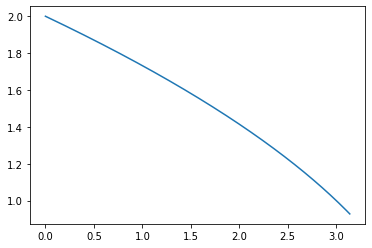

In [583]:
# Creating the dataset 
X = np.arange(0, np.pi, 0.005)
y = np.sqrt(4 - X)
plt.plot(X, y);
plt.show();
X = X.reshape(629, 1)
y = y.reshape(629, 1)

for iteration # 0

Loss: 
1215.5374156400376




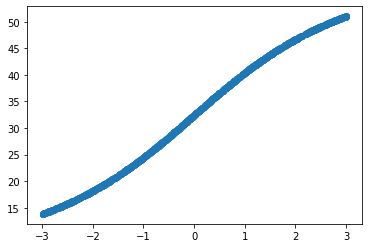

for iteration # 10

Loss: 
2.60439021627693




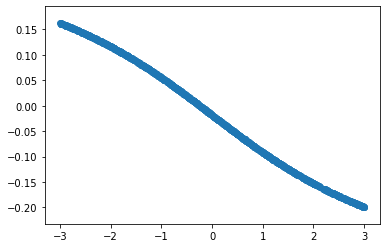

for iteration # 20

Loss: 
2.6003708232827822




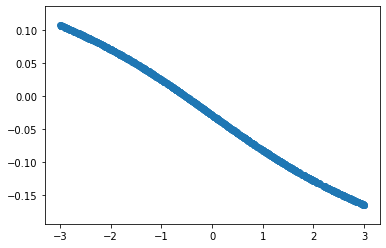

for iteration # 30

Loss: 
2.5988426448508988




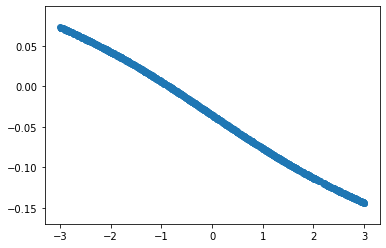

for iteration # 40

Loss: 
2.598243043359789




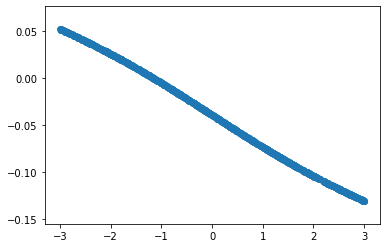

for iteration # 50

Loss: 
2.5979901958341545




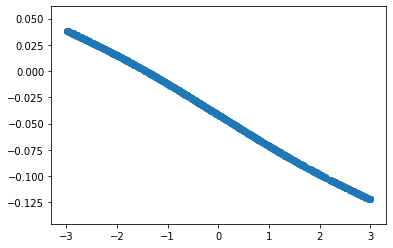

for iteration # 60

Loss: 
2.5978670754274065




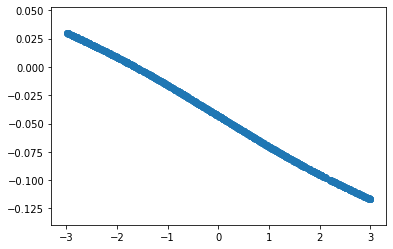

for iteration # 70

Loss: 
2.5977926409310057




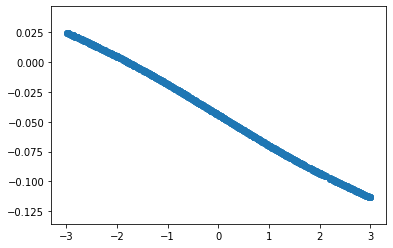

for iteration # 80

Loss: 
2.5977366095658625




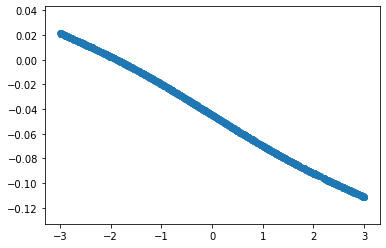

for iteration # 90

Loss: 
2.5976876599308842




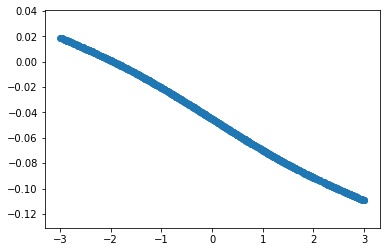

In [194]:
# Defining a Neural Network class

class NeuralNetwork:
    def __init__(self, x, y, lr):
        self.input      = x
        self.weights1   = np.random.rand(1,128) 
        self.weights2   = np.random.rand(129,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)
        self.lr         = lr
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        biases = np.ones((1000, 1))

        self.layer1 = np.concatenate((biases, self.layer1), axis = 1)
        self.output = np.dot(self.layer1, self.weights2)
        return self.output

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output), self.weights2.T[:,1:]) * sigmoid_derivative(self.layer1[:,1:])))
        
        self.weights2 += self.lr * d_weights2
        self.weights1 += self.lr * d_weights1

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
    
    def predict(self):
        self.output = self.feedforward()
        return self.output
        
NN = NeuralNetwork(X,y,0.00001)
for i in range(100): # trains the NN 1,000 times
    if i % 10 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        plt.scatter(X, NN.feedforward());
        plt.show()
        
  
    NN.train(X, y)

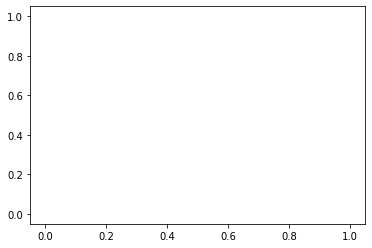

In [117]:
plt.scatter(X, NN.predict());

In [101]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consolidated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)
# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)

# TODO: Calculate change in weights
del_w = learnrate * error_term * x

print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

0.7999999999999998
Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


In [163]:
# Defining the weights
W1 = np.random.random((1, 32))
W2 = np.random.random((33, 1))


for i in range(len(X)):
    input_layer = X[i]
    hidden_layer = np.append(1, np.dot(input_layer, W1))
    output = np.dot(hidden_layer, W2)
    deltaW2 = (output - y[i]) * hidden_layer
    
    

In [320]:
def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1 - output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)

Change in weights for hidden layer to output layer:
[0.00804047 0.00555918]
Change in weights for input layer to hidden layer:
[[ 1.77005547e-04 -5.11178506e-04]
 [ 3.54011093e-05 -1.02235701e-04]
 [-7.08022187e-05  2.04471402e-04]]


for iteration # 0

Loss: 
1.4669079528589848




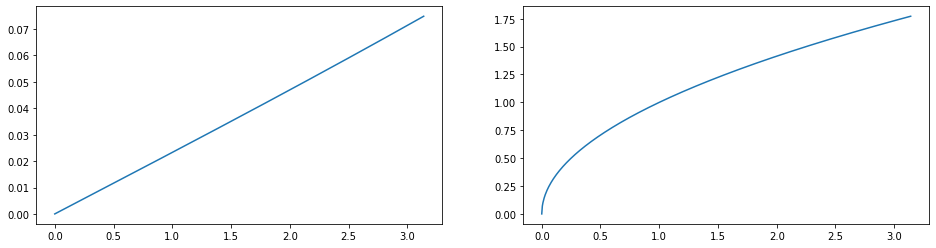

for iteration # 100

Loss: 
0.058803534587894425




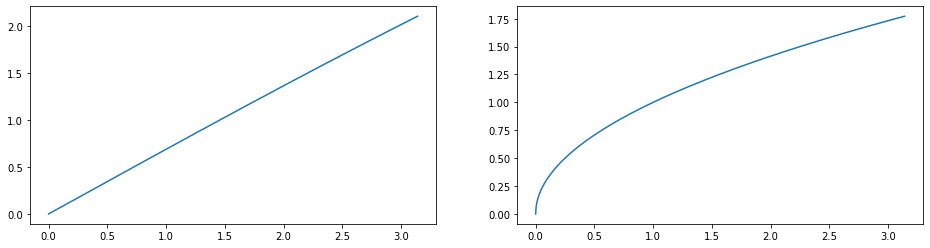

for iteration # 200

Loss: 
0.05862070908307249




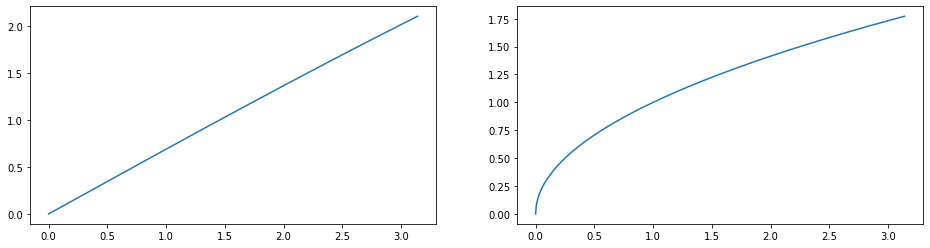

for iteration # 300

Loss: 
0.05842671911041781




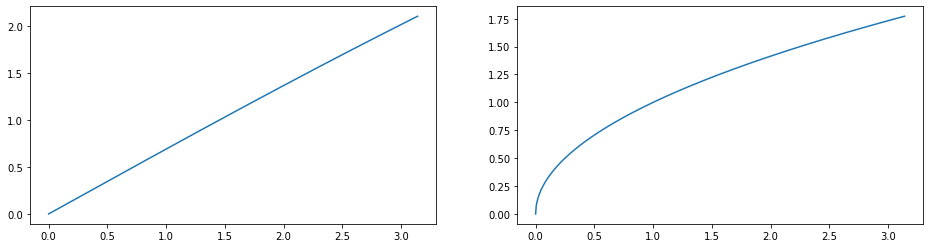

for iteration # 400

Loss: 
0.058220440469776216




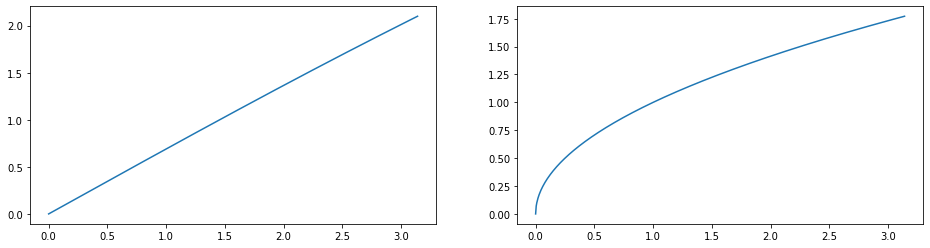

for iteration # 500

Loss: 
0.05800062185807198




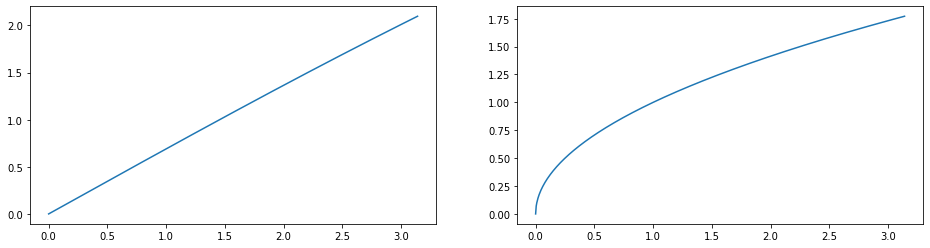

for iteration # 600

Loss: 
0.057765867164560426




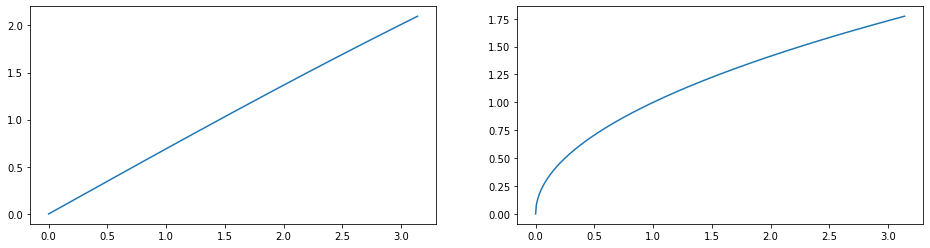

for iteration # 700

Loss: 
0.05751461519619578




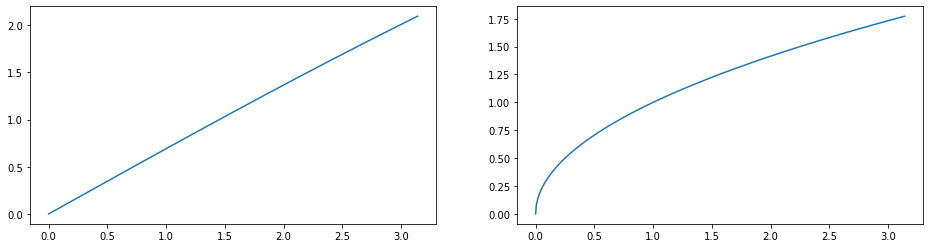

for iteration # 800

Loss: 
0.05724511647484085




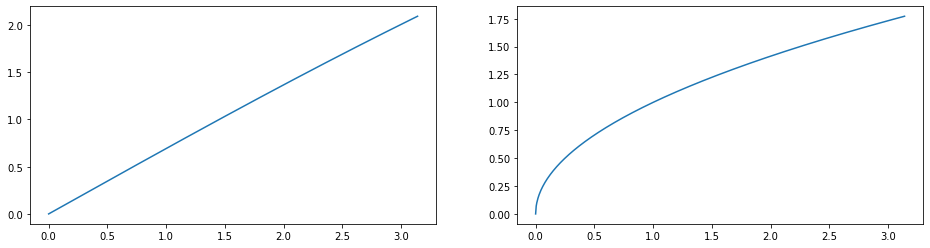

for iteration # 900

Loss: 
0.056955406725586105




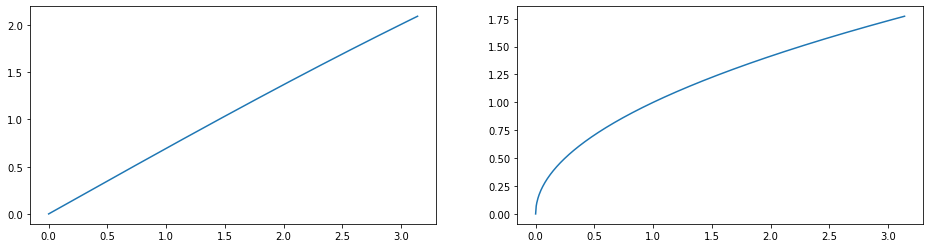

for iteration # 1000

Loss: 
0.0566432766688681




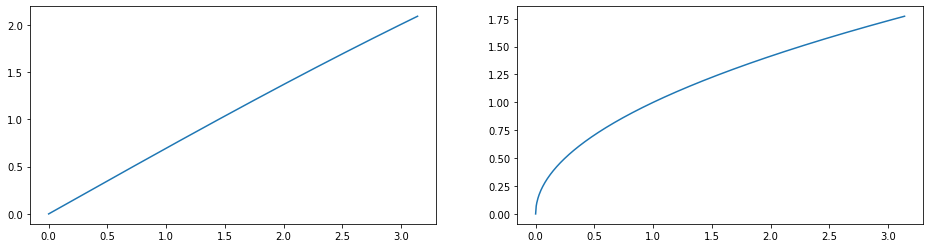

for iteration # 1100

Loss: 
0.056306237750836076




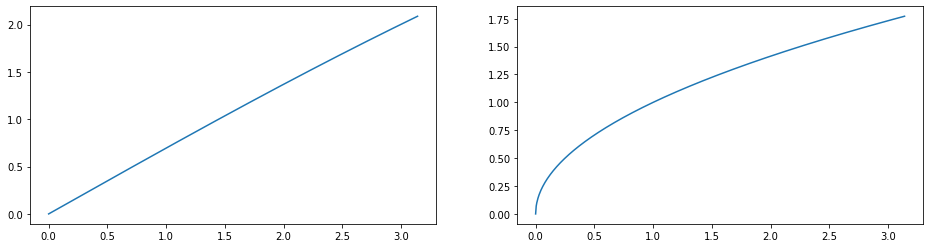

for iteration # 1200

Loss: 
0.055941483515509004




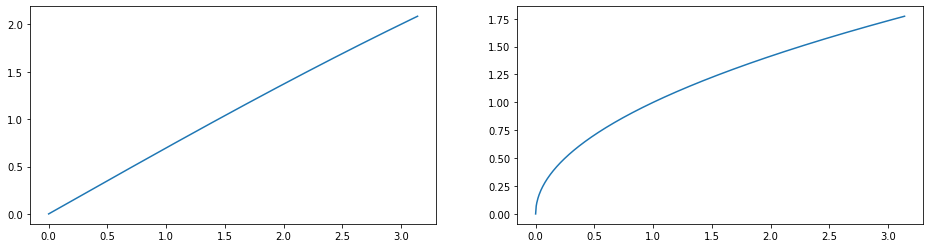

for iteration # 1300

Loss: 
0.05554584646711761




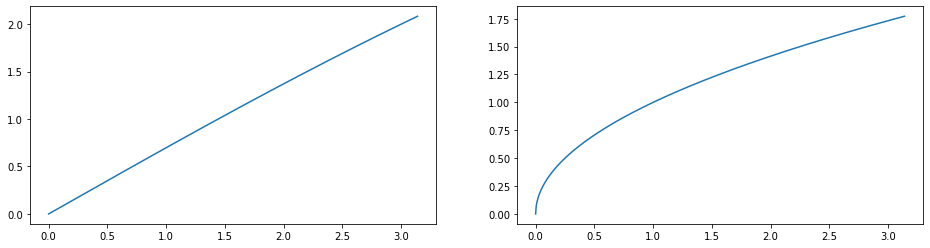

for iteration # 1400

Loss: 
0.05511575053331969




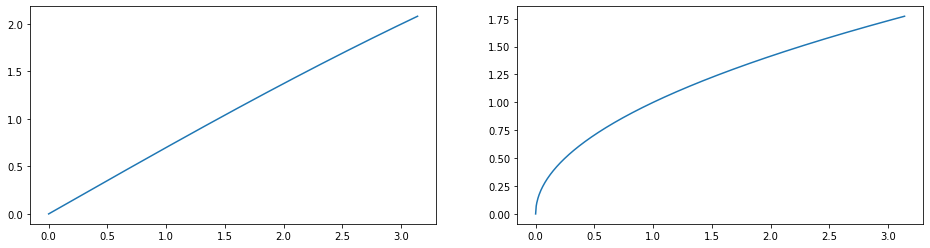

In [573]:
# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.uniform(-1, 1, (self.input.shape[1],512)) *  np.sqrt(6.0 / 513) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.uniform(-1, 1, (512,1)) * np.sqrt(6.0 / 513)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        z1 = np.dot(self.input, self.weights1)
        self.layer1 = tanh(z1)
        self.output = np.dot(self.layer1, self.weights2)
        return self.output
        
    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2 * (self.y -self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2 * (self.y -self.output), self.weights2.T)*tanh_derivative(self.layer1))
        
        
        self.weights1 += 0.00002 * d_weights1
        self.weights2 += 0.00002 * d_weights2

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
plt.show()
NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        plt.plot(X.reshape(629), NN.feedforward().reshape(629))
        plt.subplot(1, 2, 2)
        plt.plot(X.reshape(629), y.reshape(629))
        plt.show()
  
    NN.train(X, y)

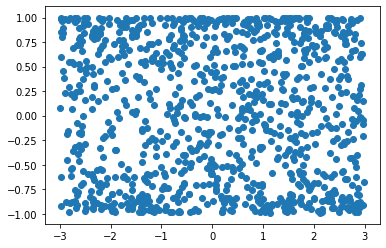

for iteration # 0

Loss: 
2.149441889261398




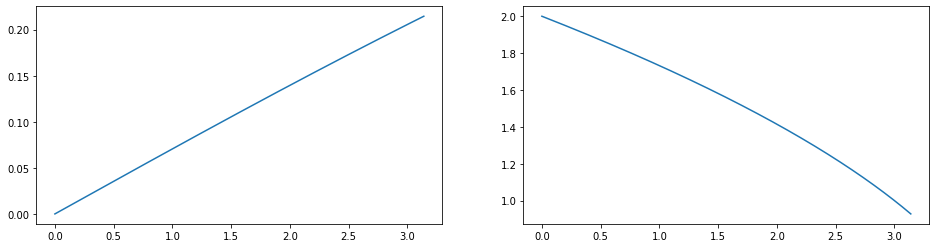

for iteration # 100

Loss: 
0.9366472439722748




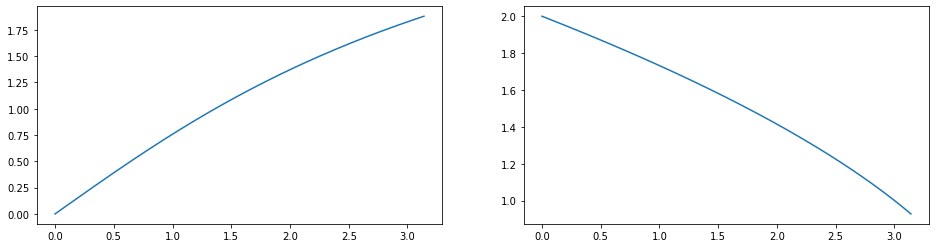

for iteration # 200

Loss: 
0.3583449867169491




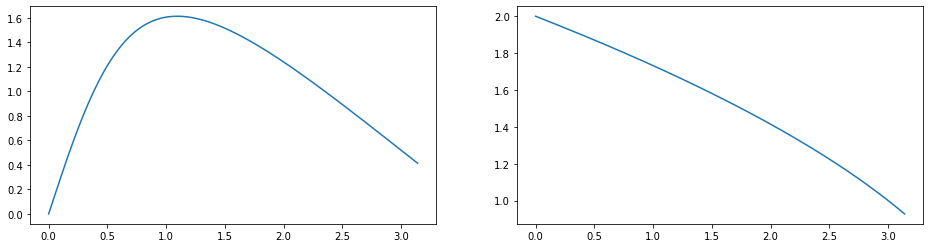

for iteration # 300

Loss: 
0.26475460834963227




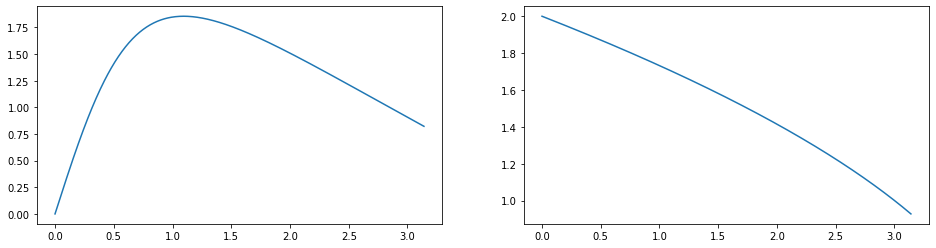

for iteration # 400

Loss: 
0.19276047814863614




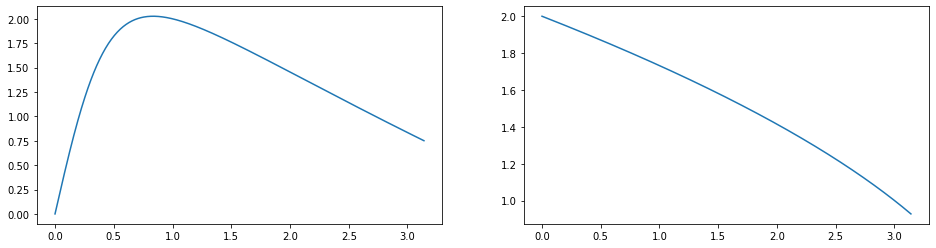

for iteration # 500

Loss: 
0.15375921925851904




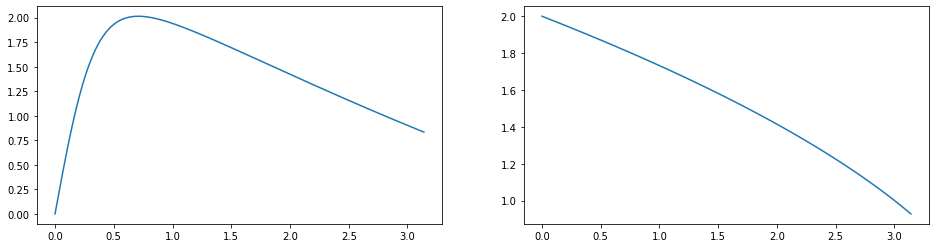

for iteration # 600

Loss: 
0.13082313505083445




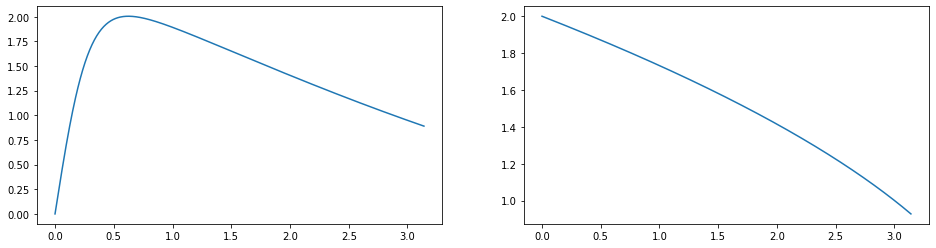

for iteration # 700

Loss: 
0.1157245830900233




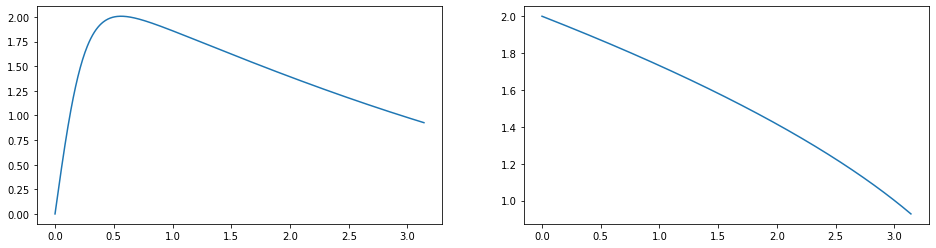

for iteration # 800

Loss: 
0.10483561707750605




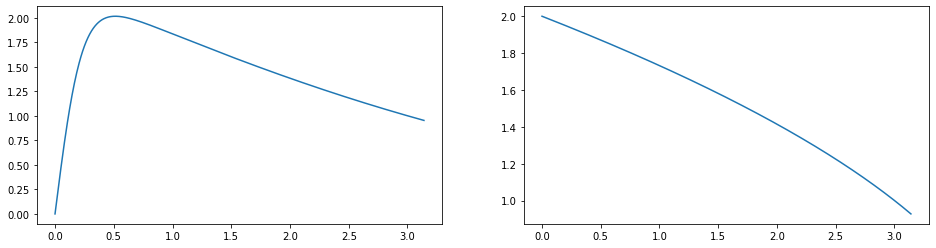

for iteration # 900

Loss: 
0.09659784006944716




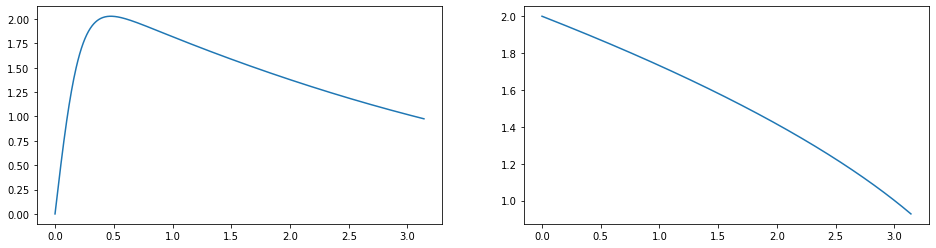

for iteration # 1000

Loss: 
0.09017813281984045




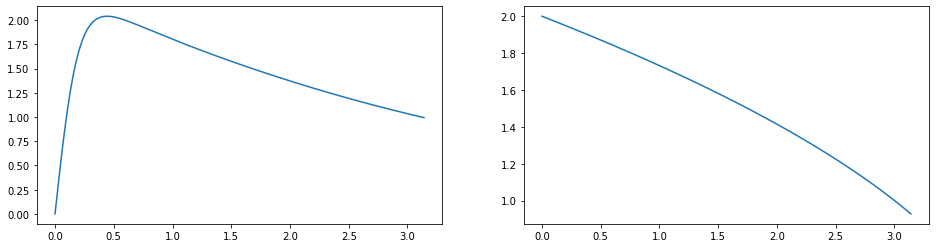

In [585]:
# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.uniform(-1, 1, (self.input.shape[1],512)) *  np.sqrt(6.0 / 513) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.uniform(-1, 1, (513,512)) * np.sqrt(6.0 / 1025)
        self.weights3 = np.random.uniform(-1, 1, (513,1)) * np.sqrt(6.0 / 514)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.z1 = np.dot(self.input, self.weights1)
        self.layer1 = tanh(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2)
        self.layer2 = tanh(self.z2)
        z3 = np.dot(self.layer2, self.weights3)
        self.output = z3
        return self.output
        
    def backprop(self):      
        
        d_weights3 = np.dot(self.layer2.T, 2*(self.y - self.output))
        d_weights2 = np.dot(self.layer1.T, np.dot(2*(self.y - self.output), self.weights3.T) * tanh_derivative(self.layer2))
        np.dot(2*(self.y - self.output), self.weights3.T) * tanh_derivative(self.layer2)
        d_weights1 = np.dot(self.input.T, np.dot(np.dot(2*(self.y - self.output), self.weights3.T) * tanh_derivative(self.layer2), self.weights2.T)*tanh_derivative(self.layer1))
        
        
        self.weights1 += 0.00007 * d_weights1
        self.weights2 += 0.00007 * d_weights2
        self.weights3 += 0.00007 * d_weights3

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
plt.show()
NN = NeuralNetwork(X,y)
for i in range(1000+1): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        plt.plot(X.reshape(629), NN.feedforward().reshape(629))
        plt.subplot(1, 2, 2)
        plt.plot(X.reshape(629), y.reshape(629))
        plt.show()
  
    NN.train(X, y)

for iteration # 0

Loss: 
2.689179316238212




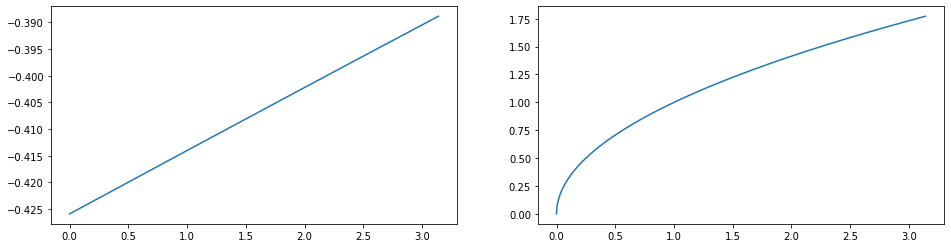

for iteration # 100

Loss: 
0.5497360643305076




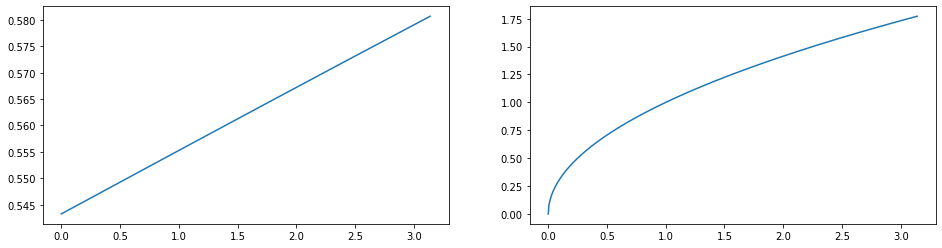

for iteration # 200

Loss: 
0.224849923186409




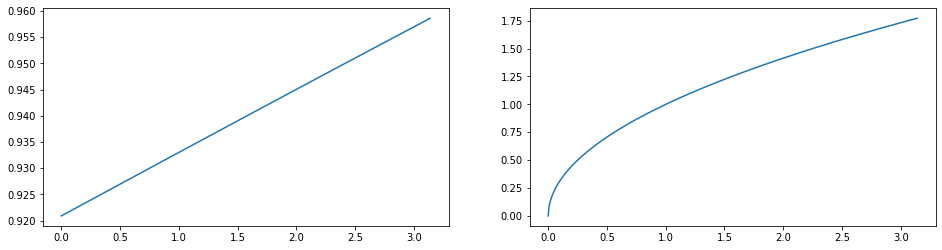

for iteration # 300

Loss: 
0.17552006840296508




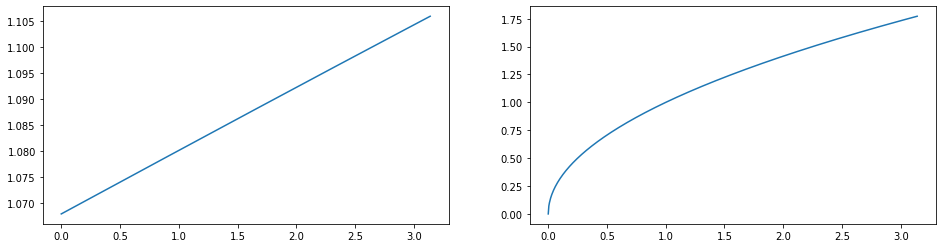

for iteration # 400

Loss: 
0.16800330646586029




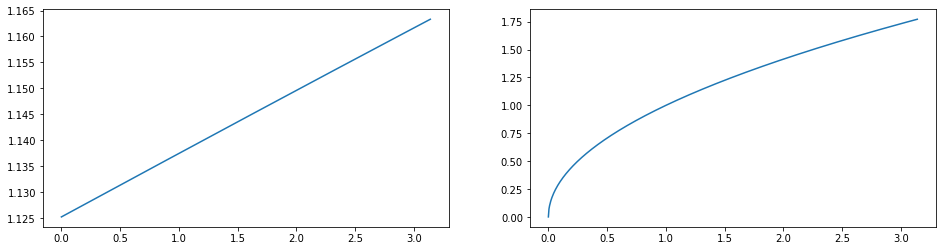

for iteration # 500

Loss: 
0.16682710712356866




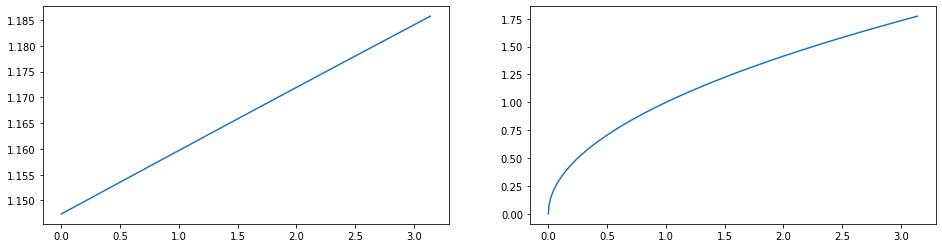

for iteration # 600

Loss: 
0.16661209738249866




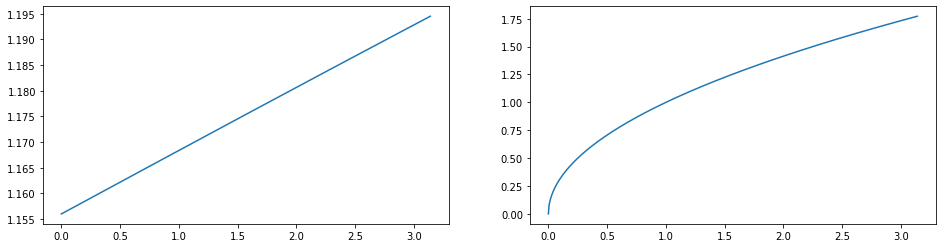

for iteration # 700

Loss: 
0.16654278422957514




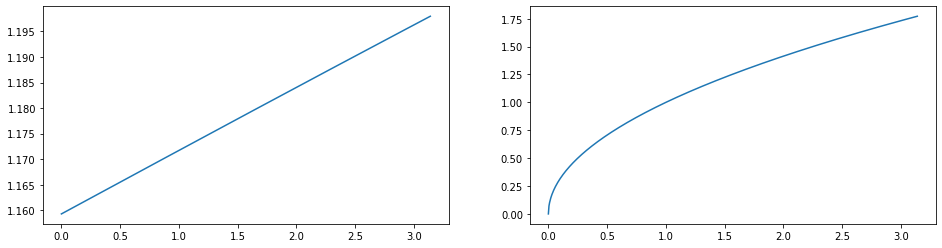

for iteration # 800

Loss: 
0.1664955603833314




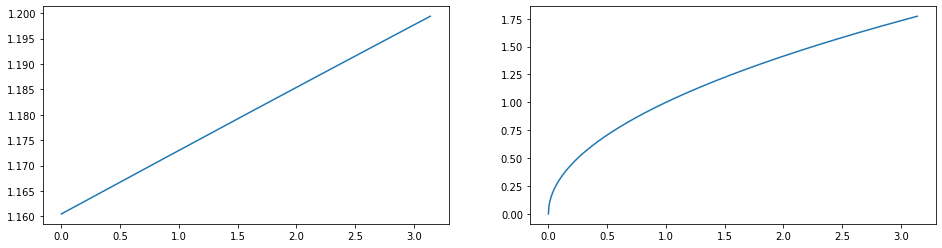

for iteration # 900

Loss: 
0.1664516914206595




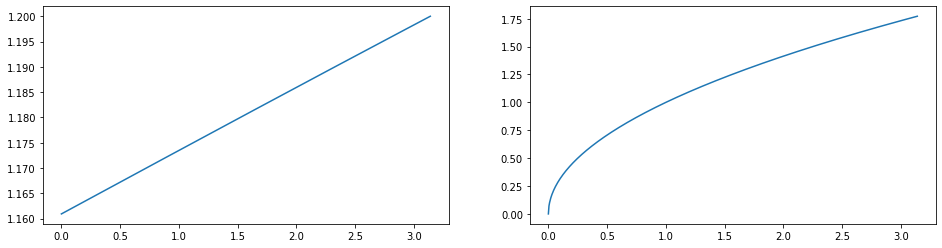

for iteration # 1000

Loss: 
0.16640833794698756




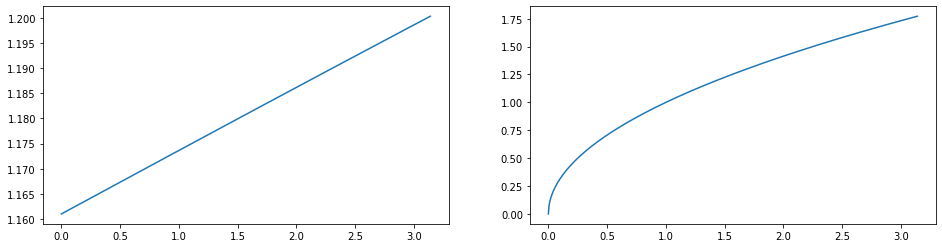

KeyboardInterrupt: 

In [577]:
# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.uniform(-1, 1, (self.input.shape[1],512)) *  np.sqrt(6.0 / 513) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.uniform(-1, 1, (512,512)) * np.sqrt(6.0 / 1024)
        self.weights3 = np.random.uniform(-1, 1, (512,1)) * np.sqrt(6.0 / 513)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.z1 = np.dot(self.input, self.weights1)
        self.layer1 = sigmoid(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2)
        self.layer2 = sigmoid(self.z2)
        z3 = np.dot(self.layer2, self.weights3)
        self.output = z3
        return self.output
        
    def backprop(self):      
        
        d_weights3 = np.dot(self.layer2.T, 2*(self.y - self.output))
        d_weights2 = np.dot(self.layer1.T, np.dot(2*(self.y - self.output), self.weights3.T) * sigmoid_derivative(self.layer2))
        d_weights1 = np.dot(self.input.T, np.dot(np.dot(2*(self.y - self.output), self.weights3.T) * sigmoid_derivative(self.layer2), self.weights2.T)*sigmoid_derivative(self.layer1))
        
        
        self.weights1 += 0.00000005 * d_weights1
        self.weights2 += 0.00000005 * d_weights2
        self.weights3 += 0.00000005 * d_weights3

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
plt.show()
NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        plt.plot(X.reshape(629), NN.feedforward().reshape(629))
        plt.subplot(1, 2, 2)
        plt.plot(X.reshape(629), y.reshape(629))
        plt.show()
  
    NN.train(X, y)

for iteration # 0

Loss: 
1.9678582656654842




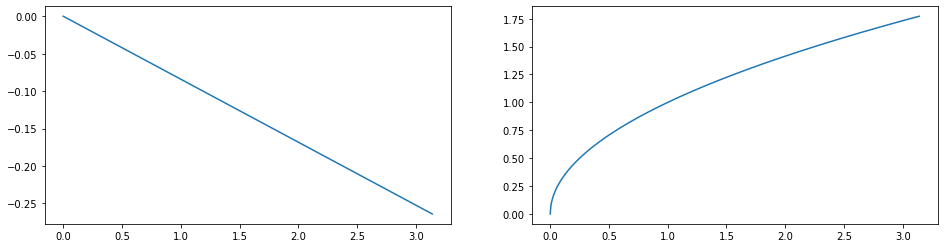

for iteration # 100

Loss: 
0.06279930397257756




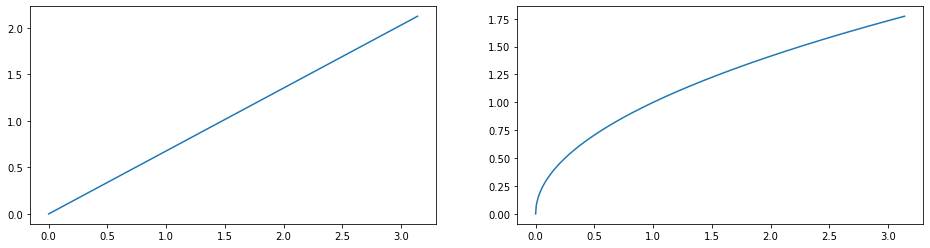

for iteration # 200

Loss: 
0.06279930397257756




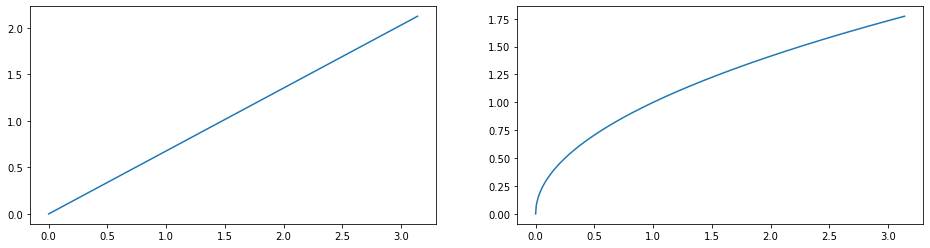

for iteration # 300

Loss: 
0.06279930397257756




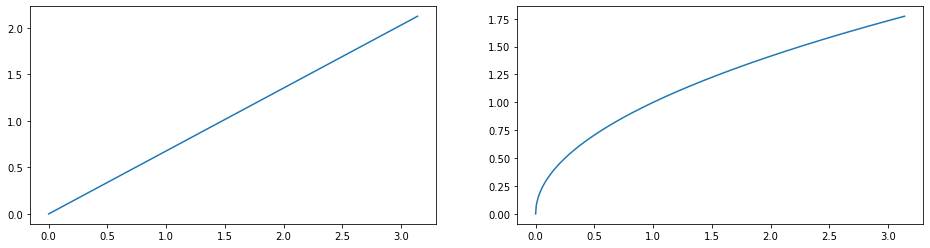

for iteration # 400

Loss: 
0.06279930397257756




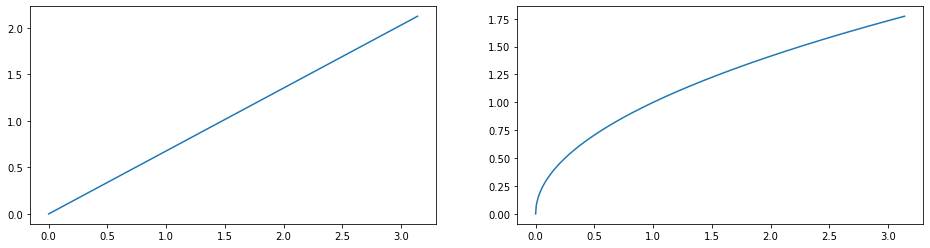

for iteration # 500

Loss: 
0.06279930397257756




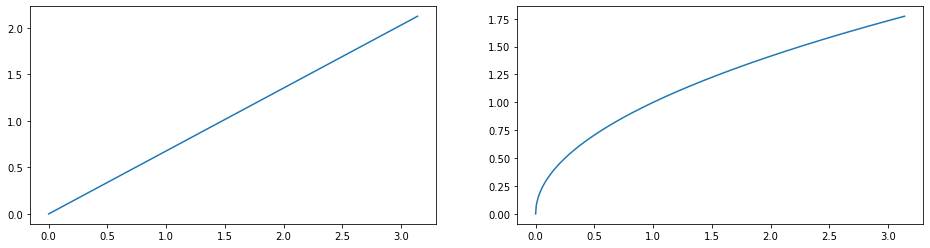

for iteration # 600

Loss: 
0.06279930397257756




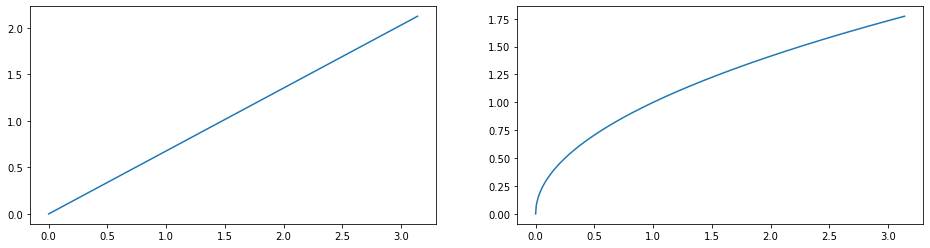

for iteration # 700

Loss: 
0.06279930397257756




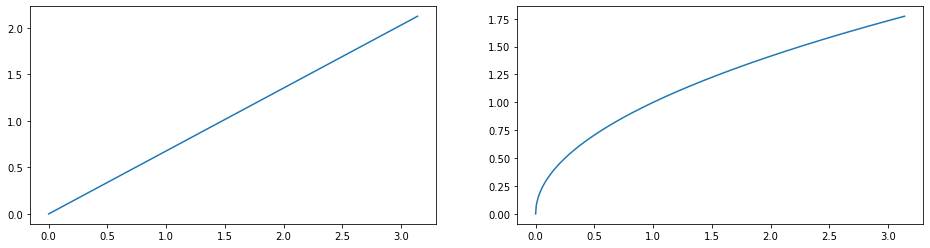

for iteration # 800

Loss: 
0.06279930397257756




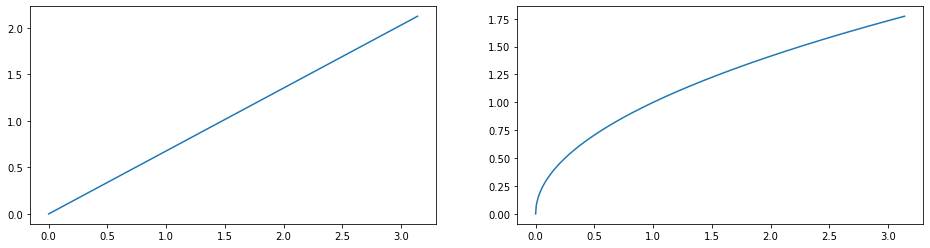

for iteration # 900

Loss: 
0.06279930397257756




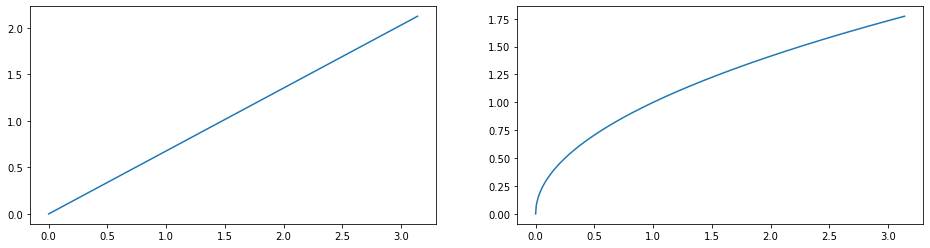

for iteration # 1000

Loss: 
0.06279930397257756




KeyboardInterrupt: 

In [579]:
# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)

# Class definition
class NeuralNetwork:
    def __init__(self, x,y):
        self.input = x
        self.weights1= np.random.uniform(-1, 1, (self.input.shape[1],512)) *  np.sqrt(6.0 / 513) # considering we have 4 nodes in the hidden layer
        self.weights2 = np.random.uniform(-1, 1, (512,512)) * np.sqrt(6.0 / 1024)
        self.weights3 = np.random.uniform(-1, 1, (512,1)) * np.sqrt(6.0 / 513)
        self.y = y
        self.output = np.zeros(y.shape)
        
    def feedforward(self):
        self.z1 = np.dot(self.input, self.weights1)
        self.layer1 = relu(self.z1)
        self.z2 = np.dot(self.layer1, self.weights2)
        self.layer2 = relu(self.z2)
        z3 = np.dot(self.layer2, self.weights3)
        self.output = z3
        return self.output
        
    def backprop(self):      
        
        d_weights3 = np.dot(self.layer2.T, 2*(self.y - self.output))
        d_weights2 = np.dot(self.layer1.T, np.dot(2*(self.y - self.output), self.weights3.T) * relu_derivative(self.layer2))
        d_weights1 = np.dot(self.input.T, np.dot(np.dot(2*(self.y - self.output), self.weights3.T) * relu_derivative(self.layer2), self.weights2.T)*relu_derivative(self.layer1))
        
        
        self.weights1 += 0.0001 * d_weights1
        self.weights2 += 0.0001 * d_weights2
        self.weights3 += 0.0001 * d_weights3

    def train(self, X, y):
        self.output = self.feedforward()
        self.backprop()
        
plt.show()
NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedforward())))) # mean sum squared loss
        print ("\n")
        plt.figure(figsize=(16,4))
        plt.subplot(1, 2, 1)
        plt.plot(X.reshape(629), NN.feedforward().reshape(629))
        plt.subplot(1, 2, 2)
        plt.plot(X.reshape(629), y.reshape(629))
        plt.show()
  
    NN.train(X, y)